In [84]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from src.replaymemory import ReplayMemory
import json
import pandas as pd

with open('config.json') as f:
    config = json.load(f)

In this notebook we will explore the replay buffer saved samples to see what situations the bot finds itself to be in most of the times.

In [20]:
state_shape = (config['env']['history_length'],config['env']['width'],config['env']['history_length'])
replay_memory=ReplayMemory(config['training']['buffer_size'],state_shape)
replay_memory.load('./data/replaybuffer/')

In [17]:
from src.models.NN_custom_features import DQN
model = DQN(config['env']['history_length'])

In [106]:
# get transformed features for the states
t_s = model._get_features(replay_memory[:]['s']).int()
# turn it into a dataframe
df = pd.DataFrame(
    {
        'free_left' : t_s[:,0],
        'free_forward' : t_s[:,1],
        'free_right' : t_s[:,2],
        'action' : replay_memory[:]['a'],
        'reward' : replay_memory[:]['r'],
        'terminal' : replay_memory[:]['terminal'].bool()
    }
)

# change action to string
df['action'] = df['action'].replace({0:'left', 1:'forward', 2:'right'})

df.head()

,free_left,free_forward,free_right,action,reward,terminal
0,8,2,6,left,-1.0,False
1,12,7,2,right,-1.0,False
2,7,1,7,left,-1.0,False
3,11,2,3,forward,-1.0,False
4,7,3,7,forward,-1.0,False


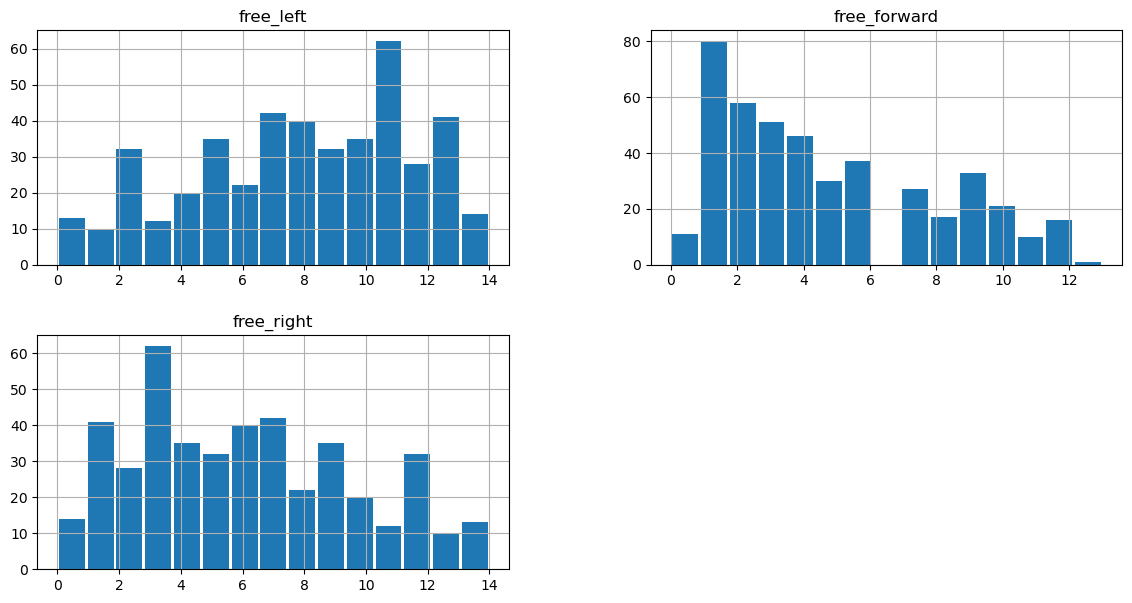

In [107]:
df[~df['terminal']].hist(
    ['free_left','free_forward','free_right'],
    rwidth=0.9,
    figsize=[14,7],
    bins=max(config['env']['width'],config['env']['height'])
    )
plt.show()

<AxesSubplot: >

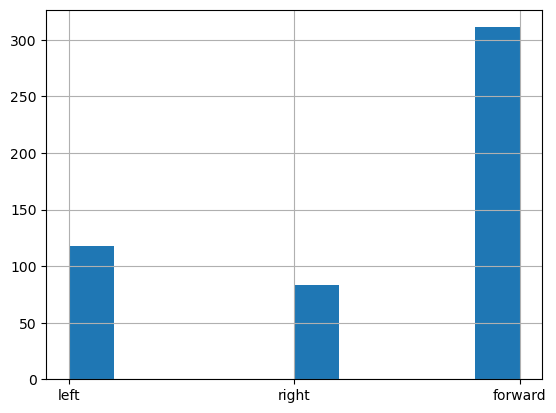

In [108]:
df.action.hist()